### Graph Travaux

In [14]:
import pandas as pd
from pyspark.sql import SparkSession

# Initialiser une session Spark
spark = SparkSession.builder \
    .appName("Chantier Analysis") \
    .getOrCreate()

# Chemin du fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data\CSV_Cool\TravauxSNCF_RATP_2019-2022.csv"

# Charger le CSV dans un DataFrame PySpark
df = spark.read.csv(csv_file_path, header=True, inferSchema=True, sep=';')

# Afficher les premières lignes pour vérifier le chargement
df.show()


+------------------+------------------------------------+----------------------+--------------------+-----------------------+-----------------------------+------------+-----------------------------+--------------------------+--------------------+------------------------+-------------------------+--------------------+--------------------+
|Référence Chantier|Code postal arrondissement - Commune|Date début du chantier|Date fin du chantier|Responsable du chantier|Maîtrise d'ouvrage principale|Surface (m2)|Synthèse - Nature du chantier|Encombrement espace public|Impact stationnement|Identifiant demande CITE|Identifiant Chantier CITE|           geo_shape|        geo_point_2d|
+------------------+------------------------------------+----------------------+--------------------+-----------------------+-----------------------------+------------+-----------------------------+--------------------------+--------------------+------------------------+-------------------------+--------------------+--

In [15]:
# Afficher le schéma du DataFrame pour comprendre les types de données
df.printSchema()

# Convertir le DataFrame en Pandas pour une utilisation avec matplotlib/seaborn
pdf = df.toPandas()


root
 |-- Référence Chantier: string (nullable = true)
 |-- Code postal arrondissement - Commune: string (nullable = true)
 |-- Date début du chantier: date (nullable = true)
 |-- Date fin du chantier: date (nullable = true)
 |-- Responsable du chantier: string (nullable = true)
 |-- Maîtrise d'ouvrage principale: string (nullable = true)
 |-- Surface (m2): double (nullable = true)
 |-- Synthèse - Nature du chantier: string (nullable = true)
 |-- Encombrement espace public: string (nullable = true)
 |-- Impact stationnement: string (nullable = true)
 |-- Identifiant demande CITE: integer (nullable = true)
 |-- Identifiant Chantier CITE: integer (nullable = true)
 |-- geo_shape: string (nullable = true)
 |-- geo_point_2d: string (nullable = true)



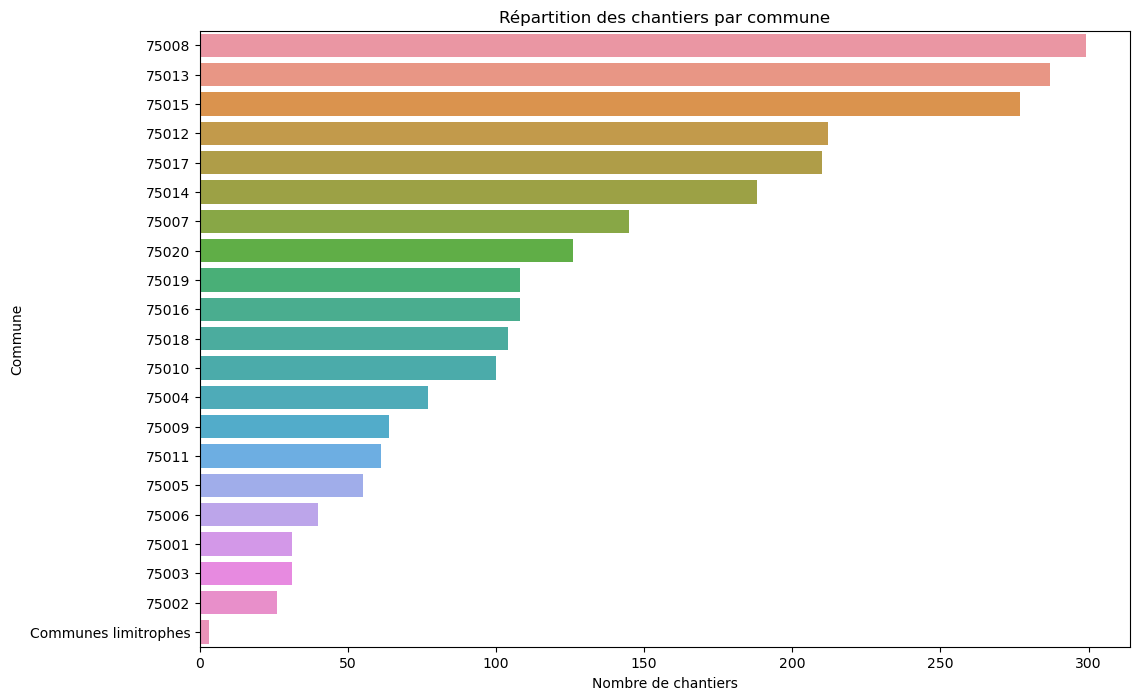

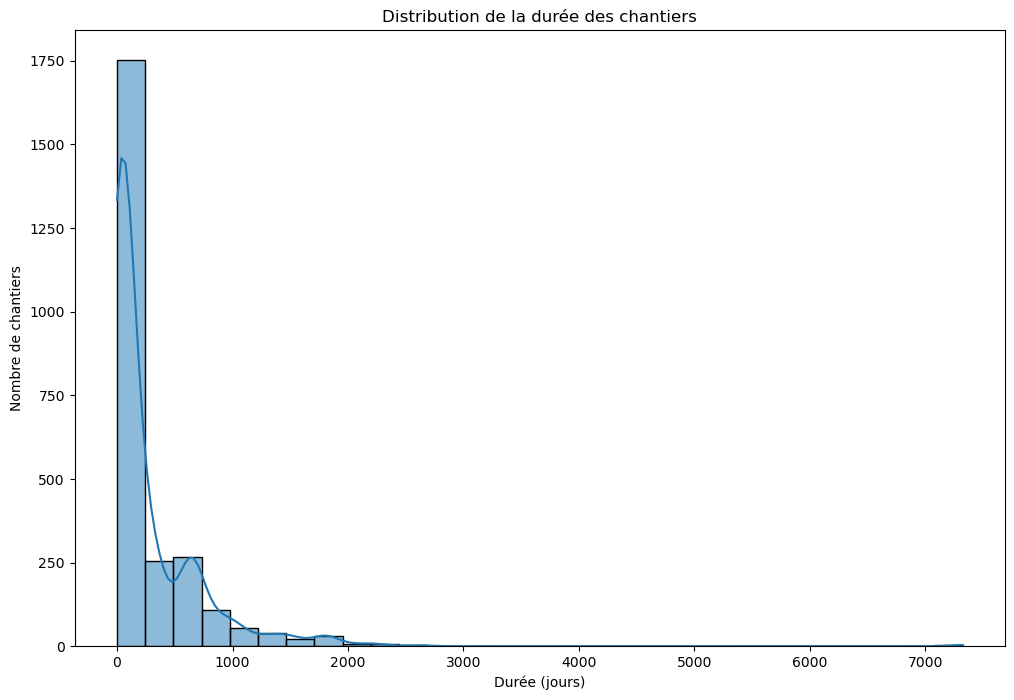

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple 1 : Répartition des chantiers par commune
plt.figure(figsize=(12, 8))
sns.countplot(y='Code postal arrondissement - Commune', data=pdf, order=pdf['Code postal arrondissement - Commune'].value_counts().index)
plt.title('Répartition des chantiers par commune')
plt.xlabel('Nombre de chantiers')
plt.ylabel('Commune')
plt.show()

# Exemple 2 : Durée des chantiers
pdf['Date début du chantier'] = pd.to_datetime(pdf['Date début du chantier'])
pdf['Date fin du chantier'] = pd.to_datetime(pdf['Date fin du chantier'])
pdf['Durée (jours)'] = (pdf['Date fin du chantier'] - pdf['Date début du chantier']).dt.days

plt.figure(figsize=(12, 8))
sns.histplot(pdf['Durée (jours)'], bins=30, kde=True)
plt.title('Distribution de la durée des chantiers')
plt.xlabel('Durée (jours)')
plt.ylabel('Nombre de chantiers')
plt.show()


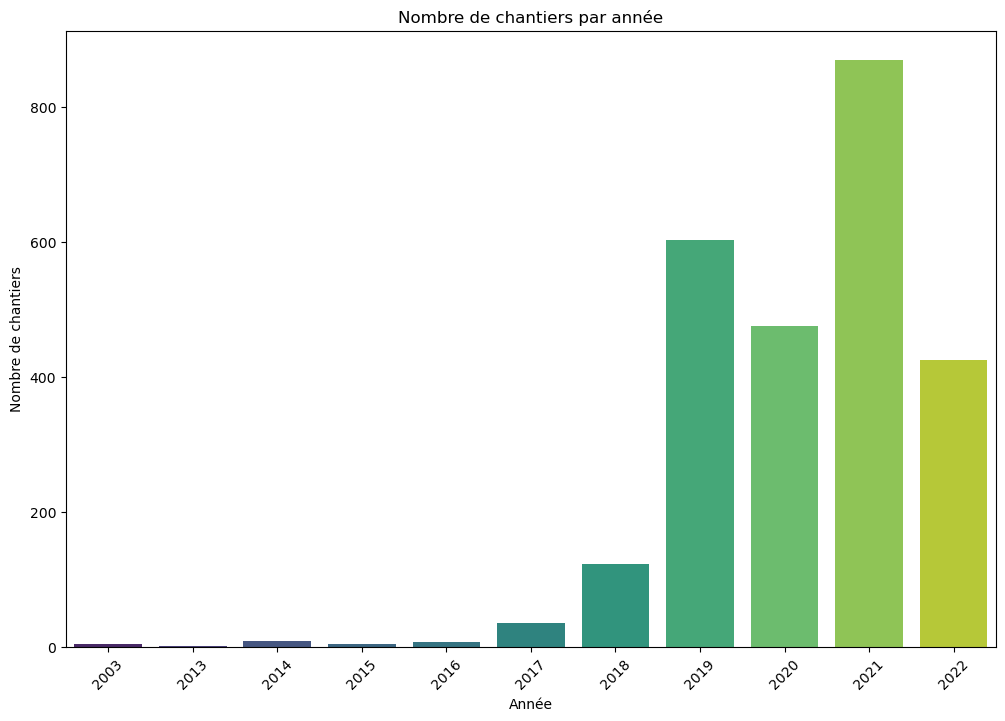

In [17]:
# Extraire l'année de début du chantier
pdf['Année début'] = pdf['Date début du chantier'].dt.year

# Graphique du nombre de chantiers par année
plt.figure(figsize=(12, 8))
sns.countplot(x='Année début', data=pdf, palette='viridis')
plt.title('Nombre de chantiers par année')
plt.xlabel('Année')
plt.ylabel('Nombre de chantiers')
plt.xticks(rotation=45)
plt.show()


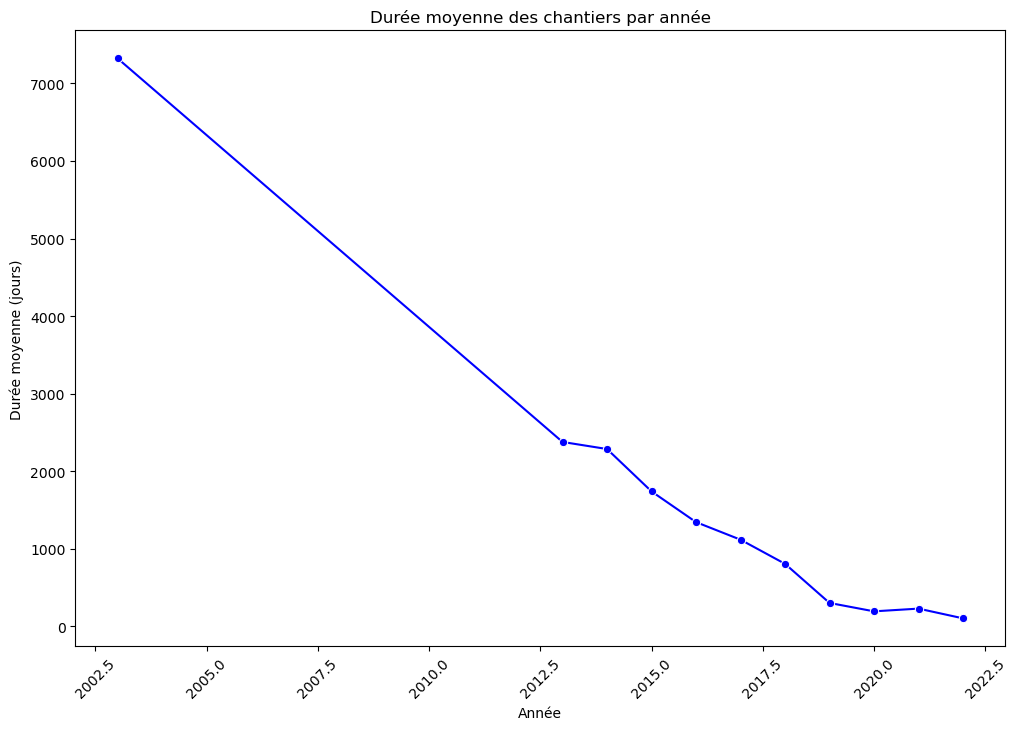

In [18]:
# Calculer la durée des chantiers
pdf['Durée (jours)'] = (pdf['Date fin du chantier'] - pdf['Date début du chantier']).dt.days

# Calculer la durée moyenne par année
mean_duration_per_year = pdf.groupby('Année début')['Durée (jours)'].mean().reset_index()

# Graphique de la durée moyenne des chantiers par année
plt.figure(figsize=(12, 8))
sns.lineplot(x='Année début', y='Durée (jours)', data=mean_duration_per_year, marker='o', color='b')
plt.title('Durée moyenne des chantiers par année')
plt.xlabel('Année')
plt.ylabel('Durée moyenne (jours)')
plt.xticks(rotation=45)
plt.show()


In [32]:
import pandas as pd
import folium

# Chemin correct vers le fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data\CSV_Cool\TravauxSNCF_RATP_2019-2022.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Créer une carte centrée sur Paris
map_chantiers = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les chantiers sur la carte
for idx, row in df.iterrows():
    if pd.notna(row['geo_point_2d']):
        coords = list(map(float, row['geo_point_2d'].split(',')))
        folium.Marker(
            location=coords,
            popup=f"{row['Référence Chantier']} - {row['Synthèse - Nature du chantier']}",
            tooltip=row['Synthèse - Nature du chantier']
        ).add_to(map_chantiers)

# Sauvegarder la carte dans un fichier HTML
map_chantiers.save('carte_chantiers.html')

# Afficher la carte dans un notebook (si vous utilisez un notebook)
map_chantiers


  Référence Chantier Code postal arrondissement - Commune  \
0           EC149360                                75004   
1           EC143169                                75015   
2           EC146035                                75017   
3           EC101353                                75001   
4             EC6520                                75012   

  Date début du chantier Date fin du chantier  \
0             2019-12-16           2019-12-20   
1             2019-11-25           2019-12-13   
2             2019-11-28           2019-12-06   
3             2019-03-08           2019-06-28   
4             2016-01-01           2022-01-25   

                           Responsable du chantier  \
0  Opérateurs de réseau (gaz-électricité-RATP-etc)   
1  Opérateurs de réseau (gaz-électricité-RATP-etc)   
2  Opérateurs de réseau (gaz-électricité-RATP-etc)   
3  Opérateurs de réseau (gaz-électricité-RATP-etc)   
4  Opérateurs de réseau (gaz-électricité-RATP-etc)   

  Maîtrise d'

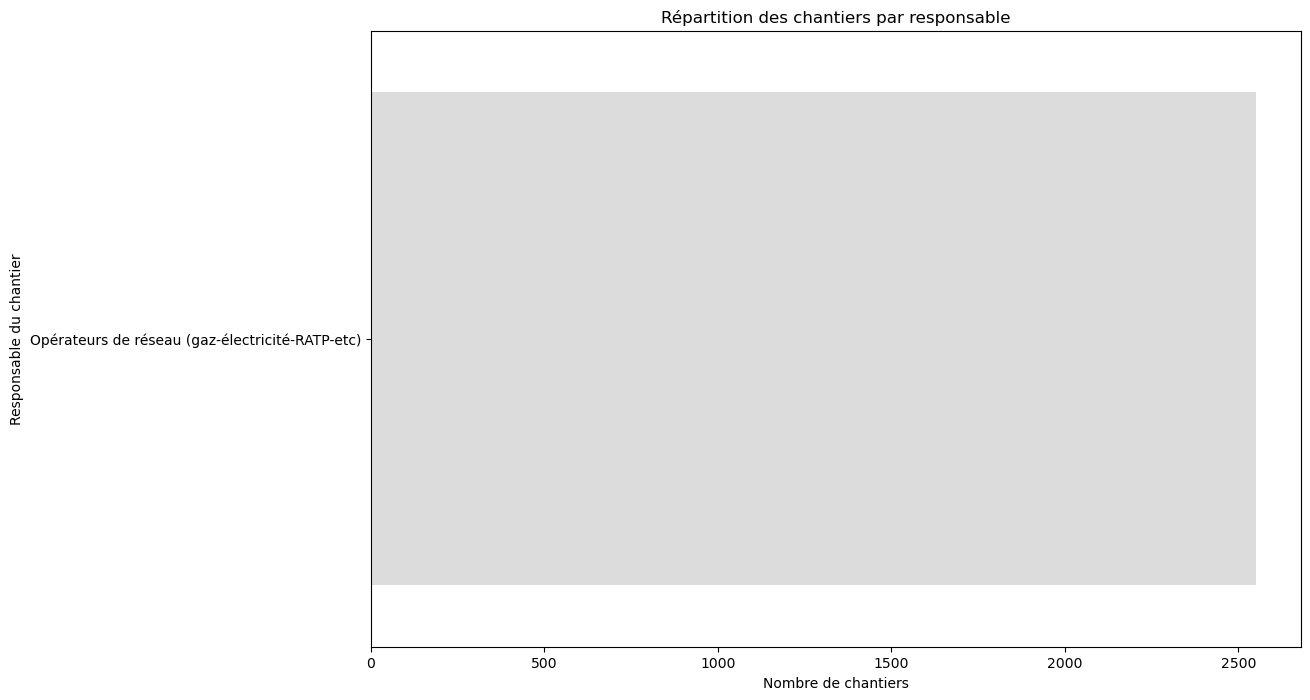

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data\CSV_Cool\TravauxSNCF_RATP_2019-2022.csv"
df = pd.read_csv(csv_file_path, delimiter=';')

# Vérifier les premières lignes du DataFrame
print(df.head())

# Graphique de la répartition des chantiers par responsable
plt.figure(figsize=(12, 8))

# Utiliser countplot pour visualiser le nombre de chantiers par responsable
sns.countplot(y='Responsable du chantier', data=df, order=df['Responsable du chantier'].value_counts().index, palette='coolwarm')

plt.title('Répartition des chantiers par responsable')
plt.xlabel('Nombre de chantiers')
plt.ylabel('Responsable du chantier')
plt.show()


### Graph Pops

                      Geo Point  \
0  48.6143359877, 2.80672187701   
1   48.922738238, 2.70848232012   
2  48.6668300608, 3.35256345807   
3  48.8432766256, 2.81653798016   
4  48.4483506973, 2.60080206666   

                                           Geo Shape  insee   rp2006  \
0  {"coordinates": [[2.806721877012404, 48.614335...  77004   117.00   
1  {"coordinates": [[2.708482320116412, 48.922738...  77005  1201.00   
2  {"coordinates": [[3.352563458068729, 48.666830...  77012   112.85   
3  {"coordinates": [[2.816537980161528, 48.843276...  77018  1882.00   
4  {"coordinates": [[2.60080206666203, 48.4483506...  77022   640.98   

        rp2007   rp2008       rp2009       rp2010   rp2011   rp2012  ...  \
0   117.037393   114.42   127.926420   126.672241   125.00   121.24  ...   
1  1214.000000  1217.00  1236.846119  1224.612555  1212.00  1210.00  ...   
2   114.924194   117.00   115.112904   114.735484   114.62   115.00  ...   
3  1942.000002  1950.00  2189.002307  2321.179247  2

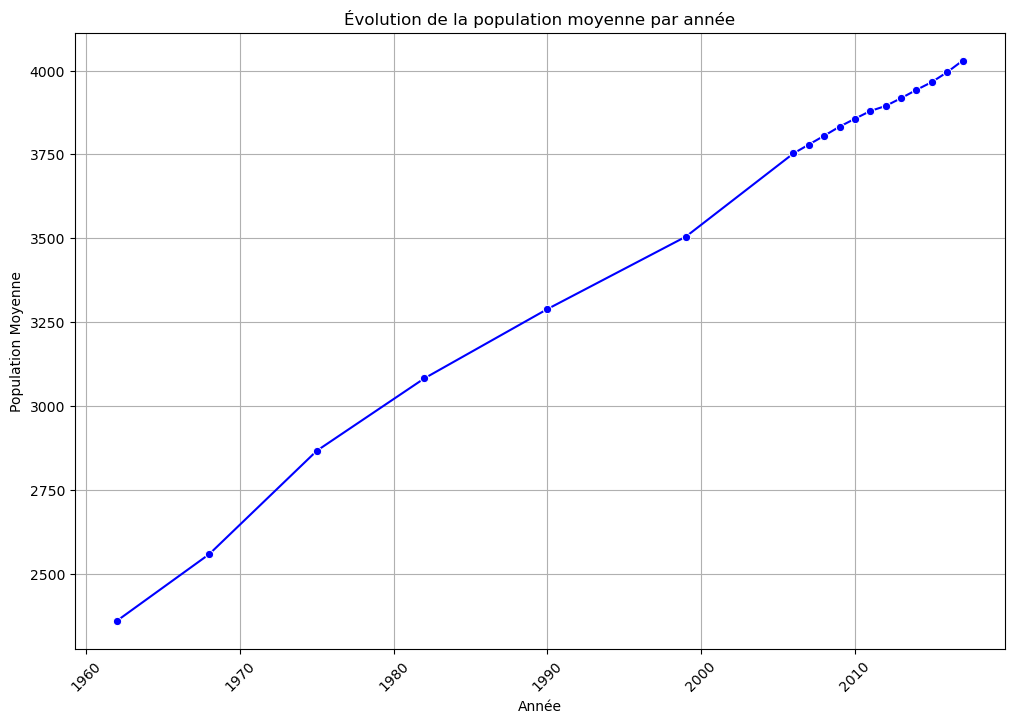

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"


# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Vérifier les premières lignes du DataFrame
print(df.head())

# Liste des colonnes de population par année
population_columns = ['rp1962', 'rp1968', 'rp1975', 'rp1982', 'rp1990', 'rp1999', 'rp2006', 'rp2007', 'rp2008', 'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015', 'rp2016', 'rp2017']

# Calculer la moyenne de la population par année
population_mean = df[population_columns].mean().reset_index()
population_mean.columns = ['Année', 'Population Moyenne']

# Convertir l'année en format entier
population_mean['Année'] = population_mean['Année'].str.extract('(\d+)').astype(int)

# Graphique de l'évolution de la population moyenne par année
plt.figure(figsize=(12, 8))
sns.lineplot(x='Année', y='Population Moyenne', data=population_mean, marker='o', color='b')
plt.title('Évolution de la population moyenne par année')
plt.xlabel('Année')
plt.ylabel('Population Moyenne')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
import folium
import os

# Chemin vers le fichier CSV
csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Séparer les coordonnées géographiques
df[['lat', 'lon']] = df['Geo Point'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Liste des colonnes de population par année
population_columns = ['rp1962', 'rp1968', 'rp1975', 'rp1982', 'rp1990', 'rp1999', 'rp2006', 'rp2007', 'rp2008', 'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015', 'rp2016', 'rp2017']

# Créer un dossier pour sauvegarder les cartes
os.makedirs('maps', exist_ok=True)

# Créer une carte pour chaque année
for year in population_columns:
    map_population = folium.Map(location=[48.8566, 2.3522], zoom_start=10)  # Centré sur Paris
    
    for idx, row in df.iterrows():
        if not pd.isna(row['lat']) and not pd.isna(row['lon']) and not pd.isna(row[year]):
            folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                popup=f"{row['insee']} - {year}: {int(row[year])} résidences principales",
                color='blue',
                fill=True,
                fill_color='blue'
            ).add_to(map_population)
    
    # Sauvegarder la carte dans un fichier HTML
    map_filename = f"maps/map_population_{year}.html"
    map_population.save(map_filename)
    print(f"Carte pour {year} sauvegardée sous {map_filename}")


Carte pour rp1962 sauvegardée sous maps/map_population_rp1962.html
Carte pour rp1968 sauvegardée sous maps/map_population_rp1968.html
Carte pour rp1975 sauvegardée sous maps/map_population_rp1975.html
Carte pour rp1982 sauvegardée sous maps/map_population_rp1982.html
Carte pour rp1990 sauvegardée sous maps/map_population_rp1990.html
Carte pour rp1999 sauvegardée sous maps/map_population_rp1999.html
Carte pour rp2006 sauvegardée sous maps/map_population_rp2006.html
Carte pour rp2007 sauvegardée sous maps/map_population_rp2007.html
Carte pour rp2008 sauvegardée sous maps/map_population_rp2008.html
Carte pour rp2009 sauvegardée sous maps/map_population_rp2009.html
Carte pour rp2010 sauvegardée sous maps/map_population_rp2010.html
Carte pour rp2011 sauvegardée sous maps/map_population_rp2011.html
Carte pour rp2012 sauvegardée sous maps/map_population_rp2012.html
Carte pour rp2013 sauvegardée sous maps/map_population_rp2013.html
Carte pour rp2014 sauvegardée sous maps/map_population_rp2014.

### Graph indacteur qualité 

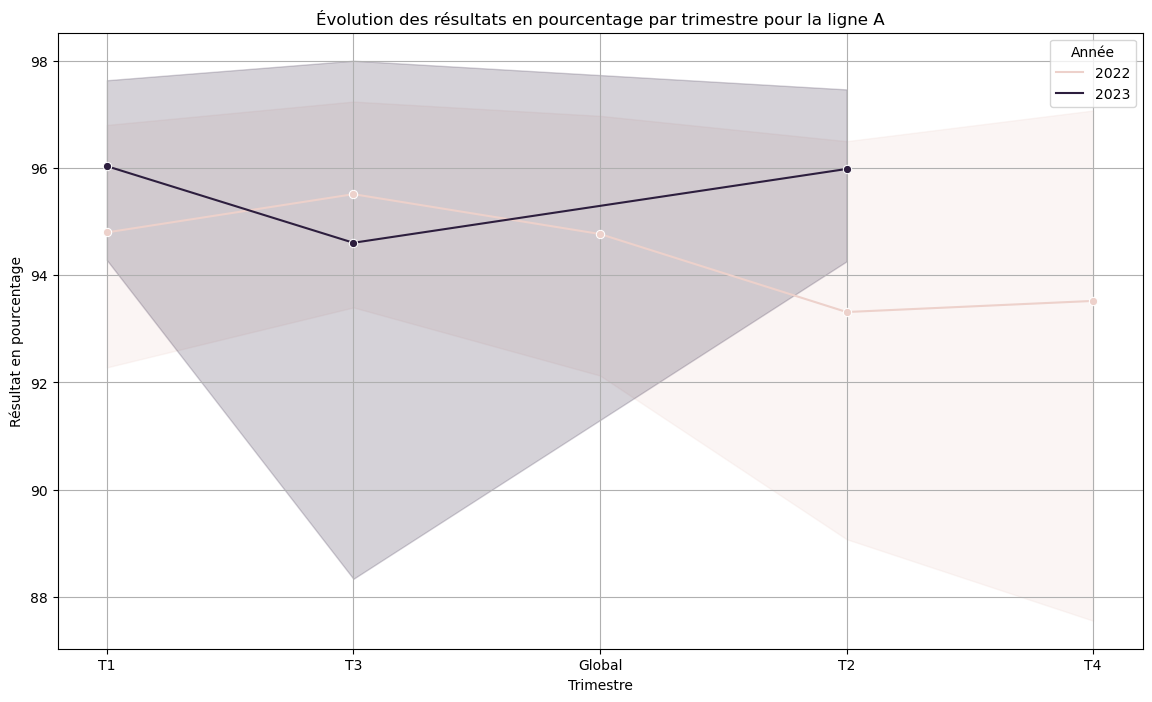

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data_model\indicateurs-qualite-service-sncf-ratp.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Filtrer pour une ligne spécifique (par exemple, ligne 'A')
ligne = 'A'
df_ligne = df[df['Name_Line'] == ligne]

# Graphique de l'évolution des résultats par trimestre et par année pour une ligne donnée
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ligne, x='Trimestre', y='ResultatEnPourcentage', hue='Annee', marker='o')
plt.title(f'Évolution des résultats en pourcentage par trimestre pour la ligne {ligne}')
plt.xlabel('Trimestre')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()


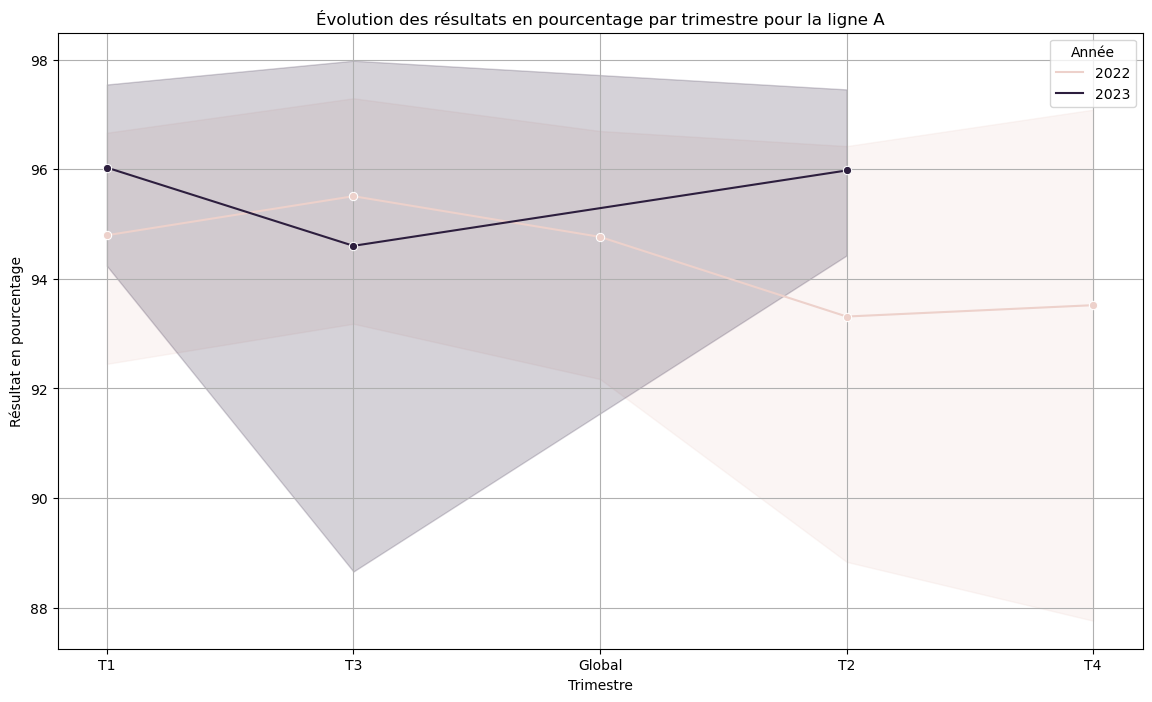

ValueError: min() arg is an empty sequence

<Figure size 1400x800 with 0 Axes>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "D:\Transport_App\ML_module\data_model\indicateurs-qualite-service-sncf-ratp.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

# 1. Évolution des résultats par trimestre et par année pour une ligne donnée
ligne = 'A'
df_ligne = df[df['Name_Line'] == ligne]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ligne, x='Trimestre', y='ResultatEnPourcentage', hue='Annee', marker='o')
plt.title(f'Évolution des résultats en pourcentage par trimestre pour la ligne {ligne}')
plt.xlabel('Trimestre')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()

# 2. Comparaison des résultats entre différentes lignes pour un indicateur spécifique
indicateur = 'Ponctualité'
df_indicateur = df[df['Indicateur'] == indicateur]
df_indicateur = df_indicateur[df_indicateur['ResultatEnPourcentage'].notna()]
plt.figure(figsize=(14, 8))
sns.barplot(data=df_indicateur, x='Name_Line', y='ResultatEnPourcentage', hue='Annee')
plt.title(f'Comparaison des résultats pour l\'indicateur {indicateur}')
plt.xlabel('Ligne')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()

# 3. Distribution des résultats en pourcentage pour une année spécifique
annee = 2021
df_annee = df[df['Annee'] == annee]
plt.figure(figsize=(14, 8))
sns.histplot(df_annee['ResultatEnPourcentage'].dropna(), bins=30, kde=True)
plt.title(f'Distribution des résultats en pourcentage pour l\'année {annee}')
plt.xlabel('Résultat en pourcentage')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 4. Impact des pénalités par ligne et par indicateur
df_penalite = df[df['Penalite'].notna()]
plt.figure(figsize=(14, 8))
sns.barplot(data=df_penalite, x='Name_Line', y='Penalite', hue='Indicateur')
plt.title('Impact des pénalités par ligne et par indicateur')
plt.xlabel('Ligne')
plt.ylabel('Pénalité')
plt.legend(title='Indicateur')
plt.grid(True)
plt.show()
